# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [104]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#size = 1500 normally
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [105]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marmarion
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | puerto escondido
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | odweyne
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | ferme-neuve
Processing Record 9 of Set 1 | nishihara
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | batemans bay
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | pondicherry
Processing Record 15 of Set 1 | sabha
Processing Record 16 of Set 1 | moju
Processing Record 17 of Set 1 | kutum
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | 

Processing Record 33 of Set 4 | homer
Processing Record 34 of Set 4 | hilo
Processing Record 35 of Set 4 | vidosi
Processing Record 36 of Set 4 | fairbanks
Processing Record 37 of Set 4 | nusaybin
Processing Record 38 of Set 4 | kaitangata
Processing Record 39 of Set 4 | linares
Processing Record 40 of Set 4 | seymchan
Processing Record 41 of Set 4 | wuwei
Processing Record 42 of Set 4 | birjand
Processing Record 43 of Set 4 | craig
Processing Record 44 of Set 4 | halalo
City not found. Skipping...
Processing Record 45 of Set 4 | nantucket
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | chickasha
Processing Record 48 of Set 4 | kawalu
Processing Record 49 of Set 4 | bowling green
Processing Record 0 of Set 5 | bloomsburg
Processing Record 1 of Set 5 | waipawa
Processing Record 2 of Set 5 | zarubino
Processing Record 3 of Set 5 | bonfim
Processing Record 4 of Set 5 | sinnamary
Processing Record 5 of Set 5 | chara
Processing Record 6 of Set 5 | ponta do sol
P

Processing Record 20 of Set 8 | alamogordo
Processing Record 21 of Set 8 | surt
Processing Record 22 of Set 8 | leningradskiy
Processing Record 23 of Set 8 | galle
Processing Record 24 of Set 8 | batagay-alyta
Processing Record 25 of Set 8 | touros
Processing Record 26 of Set 8 | beyneu
Processing Record 27 of Set 8 | tabou
Processing Record 28 of Set 8 | luderitz
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | puerto carreno
Processing Record 31 of Set 8 | goderich
Processing Record 32 of Set 8 | swansea
Processing Record 33 of Set 8 | mezica
Processing Record 34 of Set 8 | klyuchevskiy
Processing Record 35 of Set 8 | sanmenxia
Processing Record 36 of Set 8 | meyungs
City not found. Skipping...
Processing Record 37 of Set 8 | keetmanshoop
Processing Record 38 of Set 8 | raymond
Processing Record 39 of Set 8 | dakar
Processing Record 40 of Set 8 | zhytomyr
Processing Record 41 of Set 8 | mundo nuevo
Processing Record 42 of Set 8 | hambantota
Processing Record 

Processing Record 7 of Set 12 | emba
Processing Record 8 of Set 12 | deer lake
Processing Record 9 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 10 of Set 12 | panama city
Processing Record 11 of Set 12 | kununurra
Processing Record 12 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 13 of Set 12 | chernyshevskiy
Processing Record 14 of Set 12 | moron
Processing Record 15 of Set 12 | eldikan
City not found. Skipping...
Processing Record 16 of Set 12 | nanortalik
Processing Record 17 of Set 12 | muli
Processing Record 18 of Set 12 | mahon
Processing Record 19 of Set 12 | kobojango
City not found. Skipping...
Processing Record 20 of Set 12 | tukrah
Processing Record 21 of Set 12 | kiomboi
Processing Record 22 of Set 12 | penzance
Processing Record 23 of Set 12 | paita
Processing Record 24 of Set 12 | husavik
Processing Record 25 of Set 12 | sorland
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | karratha
Proce

In [106]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [107]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marmarion,38.0484,24.3204,3.19,62,48,13.73,GR,1675651841
1,busselton,-33.6500,115.3333,25.82,49,0,5.19,AU,1675651842
2,puerto escondido,15.8500,-97.0667,24.69,72,0,2.06,MX,1675651842
3,iskateley,67.6803,53.1512,-19.45,99,36,3.62,RU,1675651842
4,odweyne,9.4092,45.0640,15.49,28,12,0.65,SO,1675651843


In [108]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [109]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marmarion,38.0484,24.3204,3.19,62,48,13.73,GR,1675651841
1,busselton,-33.6500,115.3333,25.82,49,0,5.19,AU,1675651842
2,puerto escondido,15.8500,-97.0667,24.69,72,0,2.06,MX,1675651842
3,iskateley,67.6803,53.1512,-19.45,99,36,3.62,RU,1675651842
4,odweyne,9.4092,45.0640,15.49,28,12,0.65,SO,1675651843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

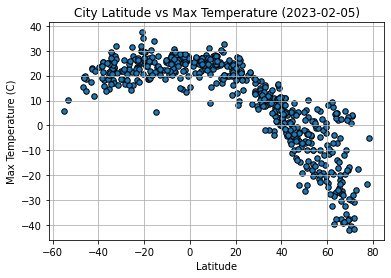

In [153]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', s=30)

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs Max Temperature (2023-02-05)")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

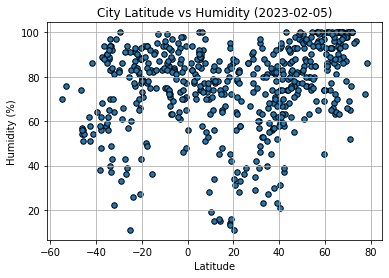

In [154]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', s=30)

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs Humidity (2023-02-05)")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

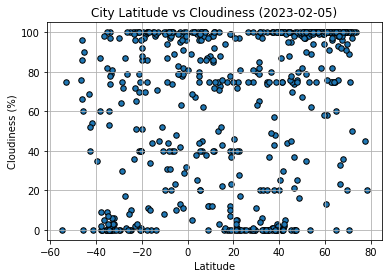

In [155]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', s=30)

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs Cloudiness (2023-02-05)")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

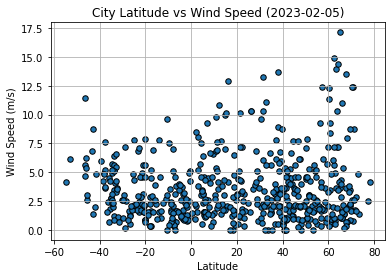

In [156]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', s=30)

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs Wind Speed (2023-02-05)")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [118]:
# Define a function to create Linear Regression plots
def linear_regression_values(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    return (slope, intercept, rvalue, regress_values)


In [119]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marmarion,38.0484,24.3204,3.19,62,48,13.73,GR,1675651841
2,puerto escondido,15.8500,-97.0667,24.69,72,0,2.06,MX,1675651842
3,iskateley,67.6803,53.1512,-19.45,99,36,3.62,RU,1675651842
4,odweyne,9.4092,45.0640,15.49,28,12,0.65,SO,1675651843
7,ferme-neuve,46.7001,-75.4493,-4.97,98,100,0.94,CA,1675651665


In [120]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,25.82,49,0,5.19,AU,1675651842
5,rikitea,-23.1203,-134.9692,26.04,76,2,6.82,PF,1675651843
6,avarua,-21.2078,-159.7750,26.03,89,100,5.66,CK,1675651844
9,batemans bay,-35.7167,150.1833,25.05,58,0,4.54,AU,1675651845
10,port alfred,-33.5906,26.8910,22.32,94,79,3.45,ZA,1675651845


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7593109947457379


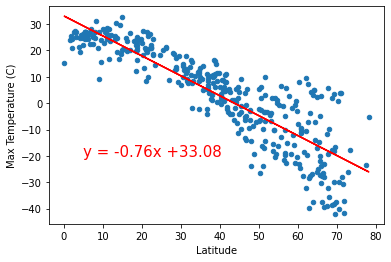

In [124]:
# Linear regression on Northern Hemisphere

(slope, intercept, rvalue, northern_regress_values) = linear_regression_values(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], s=20)
plt.plot(northern_hemi_df['Lat'],northern_regress_values, c='r')
plt.annotate(line_eq, (5, -20), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.144345090419231


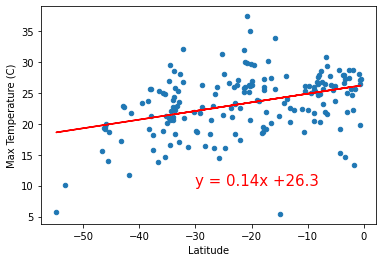

In [125]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, southern_regress_values) = linear_regression_values(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], s=20)
plt.plot(southern_hemi_df['Lat'], southern_regress_values, c='r')
plt.annotate(line_eq, (-30, 10), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** 

In the Northern hemisphere, there is a strong negative linear relationship between latitude and max temperature. In the Southern hemisphere, there is a weak positive linear relationship between latitude and max temperature. This shows that the closer you are to 0 in latitude, the higher your max temperature will be. This makes sense as 0 is the equator and anything around +-90 will be on the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12764331883320026


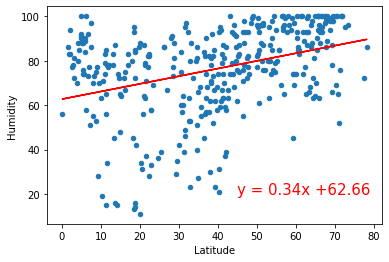

In [132]:
# Northern Hemisphere
(slope, intercept, rvalue, northern_regress_values) = linear_regression_values(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], s=20)
plt.plot(northern_hemi_df['Lat'],northern_regress_values, c='r')
plt.annotate(line_eq, (45, 20), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.07942979593431956


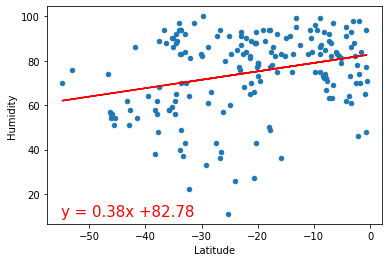

In [140]:
# Southern Hemisphere
(slope, intercept, rvalue, southern_regress_values) = linear_regression_values(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], s=20)
plt.plot(southern_hemi_df['Lat'], southern_regress_values, c='r')
plt.annotate(line_eq, (-55, 10), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:**

In both hemispheres, there is no linear relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07133644946333616


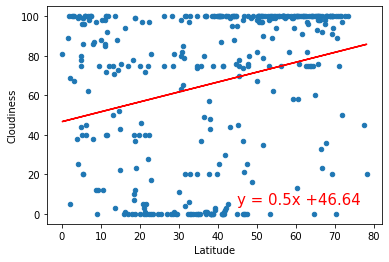

In [144]:
# Northern Hemisphere
(slope, intercept, rvalue, northern_regress_values) = linear_regression_values(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], s=20)
plt.plot(northern_hemi_df['Lat'],northern_regress_values, c='r')
plt.annotate(line_eq, (45, 5), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.11264519763336778


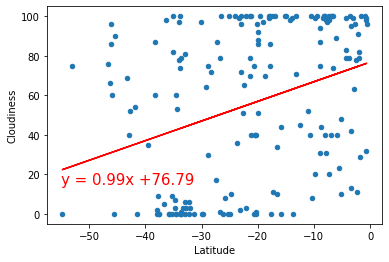

In [146]:
# Southern Hemisphere
(slope, intercept, rvalue, southern_regress_values) = linear_regression_values(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], s=20)
plt.plot(southern_hemi_df['Lat'], southern_regress_values, c='r')
plt.annotate(line_eq, (-55, 15), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:**

Similarly, there is no linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0009091352586264632


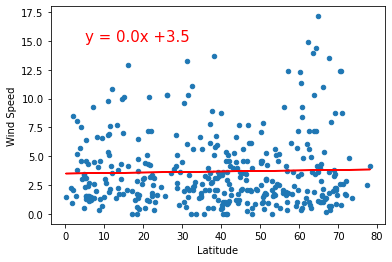

In [148]:
# Northern Hemisphere
(slope, intercept, rvalue, northern_regress_values) = linear_regression_values(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], s=20)
plt.plot(northern_hemi_df['Lat'],northern_regress_values, c='r')
plt.annotate(line_eq, (5, 15), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.11657348962141492


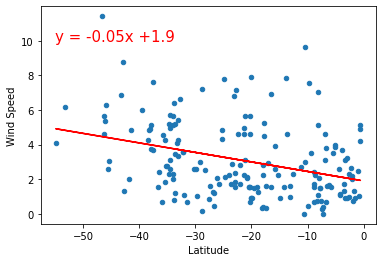

In [151]:
# Southern Hemisphere
(slope, intercept, rvalue, southern_regress_values) = linear_regression_values(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], s=20)
plt.plot(southern_hemi_df['Lat'], southern_regress_values, c='r')
plt.annotate(line_eq, (-55, 10), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:**

In there Northern hemisphere, there is no linear relationship between latitude and wind speed. In the Southern hemisphere, there is a weak linear relationshiip between latitude and wind speed.